Erstellt von **Frederik Alexander**

In [2]:
using LinearAlgebra
using OrdinaryDiffEq
using Plots

# SI Model

295.11911518298473
102.44044240850764

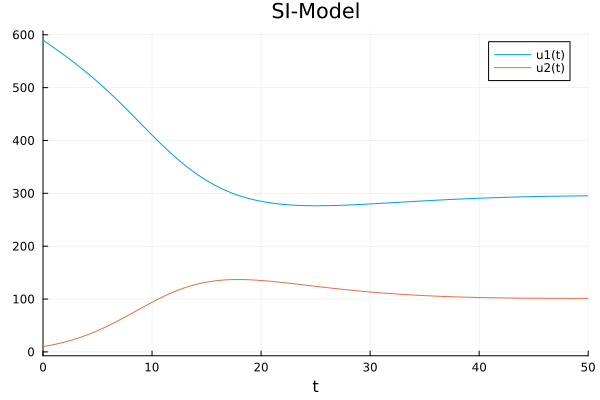

In [7]:
function f(du,u,p,t)
    p, A, α, β, γ, d = p
    du[1] = (1-p) * A - β*u[1]*u[2] + γ*u[2] - d*u[1]    # S'
    du[2] = p * A + β*u[1]*u[2] - (d+γ+α)*u[2]           # I'
end

p = 0.01        # Ratio of infected to uninfected incoming population
A = 50.0        # Population growth rate
α = 0.1         # Rate of death due to illness
β = 1e-3        # Rate of infection per infected
γ = 0.1         # Rate of recovery
d = 0.1         # Rate of death due to unrelated causes


#Fix punkte nur für β*d!=0 und α + d!=0, und A konstant
S_fix = (-sqrt((d*(α + d + γ) + A*β)^2 - 4*A*β*d*(α*(-p) + α - d*p + d + γ)) + α*d + A*β + d^2 + d*γ)/(2*β*d)
I_fix = -(-sqrt((d*(α + d + γ) + A*β)^2 - 4*A*β*d*(α*(-p) + α - d*p + d + γ)) + α*d - A*β + d^2 + d*γ)/(2*β*(α + d))
print(S_fix , "\n")
print(I_fix)

N0 = 600.0
I0 = 10.0
u0 = [N0 - I0, I0]

tspan = (0.0, 50.0)

prob = ODEProblem(f, u0, tspan, (p, A, α, β, γ, d))
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

plt = plot(title="SI-Model", legend=:topright)
plot!(plt, sol)


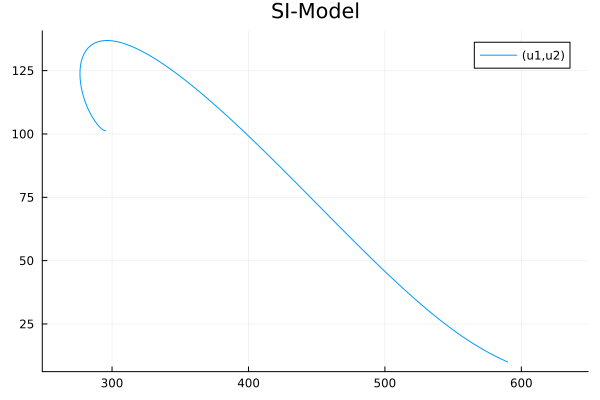

In [8]:
plt = plot(title="SI-Model", legend=:topright)
plot!(plt, sol, idxs=(1,2)) # plot S vs I

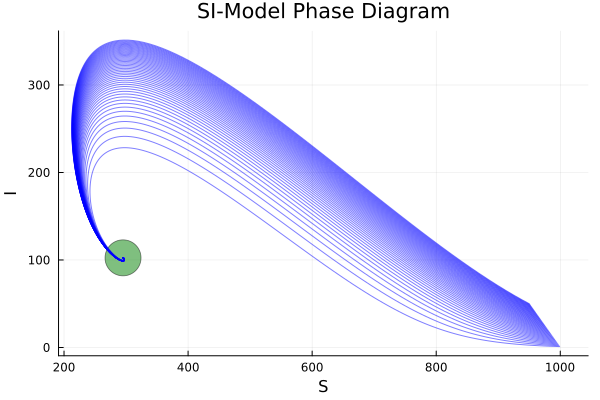

In [24]:

N0_range = 1000:1:1000 # range of initial total population values to simulate
I0_range = 1:1:50 # range of initial infected values to simulate

plt1 = plot(title="SI-Model Phase Diagram", xlabel="S", ylabel="I", legend=false)
scatter!([S_fix], [I_fix], color=:green, alpha=0.5, label = "Equilibrium point", markersize = 20)
for N0 in N0_range, I0 in I0_range
    u0 = [N0 - I0, I0]
    tspan = (0.0, 200.0)
    prob = ODEProblem(f, u0, tspan, (p, A, α, β, γ, d))
    sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)
    plot!(plt1, sol, vars=(1,2), color=:blue, alpha=0.5)
end

savefig(plt1, "../figures/si-phase-diagram.pdf")

display(plt1)